# Comparison of Performance of *k*-Nearest Neighbors and Linear Regression
### (for a binary classification problem)
### [Azeem Khadam](azeem.khadam@uni-graz.at)

### November 2021

**Note:** Please note that this article originated from an exercise of the semester course Mathematical Foundations of Machine Learning delivered by [Ass.-Prof. Martin Höller](https://imsc.uni-graz.at/hollerm/) at the University of Graz in Winter 2021/22.

--------------------

In order to compare the (binary) classification performance of *k*-Nearest Neighbors' (shortly hereafter *k*-NN) algorithm and Linear Regression or Ordinary Least Squares (shortly hereafter OLS) model, we use the so-called *normalized* MNIST Data available at [https://web.stanford.edu/~hastie/ElemStatLearn/](https://web.stanford.edu/~hastie/ElemStatLearn/) under ZIP code.

## About the data

The data consists of handwritten digits, which were automatically scanned from envelopes by the U.S. Postal Service. The resulting images here in the normalized version are 16 x 16 grayscale images. Each line of the data consists of the digit
with id (0-9) followed by the 256 grayscale values (more explanation comes later). There are 7291 training observations and 2007 test observations (the original dataset available at [MNIST](http://yann.lecun.com/exdb/mnist/) consists 60,000 training observations and 10,000 test observations).

Now in order to upload the data, we first import some of the required packages and then upload the data by using `pandas` immediately afterwards.

In [1]:
# import numpy, pandas and matplotlib.pyplot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import the tarining and test datasets

train = pd.read_csv("zip.train", header = None, names = ["AAA"])
test = pd.read_csv("zip.test", header = None, names = ["BBB"])

# information about the datasets
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AAA     7291 non-null   object
dtypes: object(1)
memory usage: 57.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BBB     2007 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


So the above information confirmed the number of rows in both the datasets as mentioned above. Both datasets have only single column whose data type is `object`. To understand more, let us look at the first 10 rows of the training data by using `head` method.

In [2]:
train.head(10)

,AAA
0,6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
1,5.0000 -1.0000 -1.0000 -1.0000 -0.8130 -0.6710...
2,4.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
3,7.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
4,3.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
5,6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
6,3.0000 -1.0000 -1.0000 -1.0000 -0.8300 0.4420 ...
7,1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
8,0.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
9,1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...


Although our data has only one column, but in reality it has 257 column. The "first" column corresponds to the digits we want to identify, whereas the next 256 columns correspond to features of the digit. We need to convert out data into a `numpy` array which really has 257 columns.

## Data conversion

In [3]:
# split the rows by using delimiter " "

train = train["AAA"].str.split(" ", expand = True)
test = test["BBB"].str.split(" ", expand = True)

# convert to Numpy arrays

train_np = train.to_numpy()                                                     
test_np = test.to_numpy()

# shape of the array

print("Shape of the traning array: {}".format(train_np.shape))
print("Shape of the testing array: {}".format(test_np.shape))

Shape of the traning array: (7291, 258)
Shape of the testing array: (2007, 257)


We see here that the number of columns in the training dataset are 258, although they should be 257. The reason behind this is that the last column of the training data is empty:

In [4]:
# last column of the training data

train_np[:, 257]

array(['', '', '', ..., '', '', ''], dtype=object)

So we delete the last column and then convert it into a floating data type.

In [5]:
# delete the last column of the training data

train_np = np.delete(train_np, 257, axis = 1)

# convert the datatype

train_np = train_np.astype(float)  
test_np = test_np.astype(float)  

# shapf of the new training array

print("Shape of the new training array: {}".format(train_np.shape))

Shape of the new training array: (7291, 257)


Let us now look at the first 2 rows of the traning data.

In [6]:
# first two rows of the training data
train_np[:2]

array([[ 6.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -0.631,  0.862, -0.167, -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.992,
         0.297,  1.   ,  0.307, -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.41 ,
         1.   ,  0.986, -0.565, -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.683,  0.825,
         1.   ,  0.562, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -0.938,  0.54 ,  1.   ,
         0.778, -0.715, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   ,  0.1  ,  1.   ,  0.922,
        -0.439, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -0.257,  0.95 ,  1.   , -0.162,
        -1.   , -1.   , -1.   , -0.987, -0.714, -0.832, -1.   , 

## Binary classification

In the next step we extract two classes of digits (2s and 3s here) among 0-9 which we want to for study binary classification problem.

In [7]:
# Extraction of digits 2s and 3s

train_np=train_np[(train_np[:, 0] == 2) | (train_np[:, 0] == 3)]
test_np=test_np[(test_np[:, 0] == 2) | (test_np[:, 0] == 3)]

# first two rows of testing data

test_np[ : 2]

array([[ 3.   , -1.   , -1.   , -1.   , -0.593,  0.7  ,  1.   ,  1.   ,
         1.   ,  1.   ,  0.853,  0.075, -0.925, -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -0.553,  0.998,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  0.961, -0.076, -0.999, -1.   ,
        -1.   , -1.   , -1.   ,  0.228,  1.   ,  0.849, -0.15 , -0.705,
        -1.   , -0.85 , -0.333, -0.072,  0.929,  1.   , -0.451, -1.   ,
        -1.   , -1.   , -1.   , -0.586,  0.777, -0.524, -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   ,  0.344,  1.   ,  0.544, -0.999,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -0.803,  0.93 ,  1.   ,  0.65 , -0.999,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -0.579,  0.821,  1.   ,  1.   , -0.131, -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -0.621,  0.156,  0.934,  1.   ,  1.   ,  0.575, -0.933, 

Now we separate the first column with all others. That is, we separate the features and labels.

In [8]:
# separation of labels from the features

feature_train = train_np[:, 1:]
feature_test = test_np[:, 1:]
label_train = train_np[:, 0]
label_test = test_np[:, 0]

# shape of arrays

print("Shape of the traning features: {}".format(feature_train.shape))
print("Shape of the testing features: {}".format(feature_test.shape))
print("Shape of the traning labels: {}".format(label_train.shape))
print("Shape of the testing labels: {}".format(label_test.shape))

# first 15 entries of training labels which is a vector

label_train[: 15]

Shape of the traning features: (1389, 256)
Shape of the testing features: (364, 256)
Shape of the traning labels: (1389,)
Shape of the testing labels: (364,)


array([3., 3., 3., 3., 3., 2., 3., 3., 2., 2., 2., 2., 2., 2., 3.])

We can also draw a scatter plot of the first two training features in order to see the distribution of both the digits. But this is not very useful as you can see here (the data has 256 features!).

Text(0, 0.5, 'Second feature')

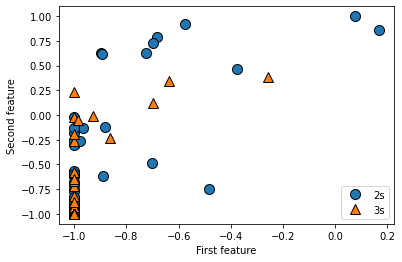

In [9]:
# import mglearn first

import mglearn

# draw the scatter plot of first two training features

mglearn.discrete_scatter(feature_train[:, 0], feature_train[:, 1], label_train)
plt.legend(["2s", "3s"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

### Builing the model *k*_NN

The *k*-NN classification algorithm is implemented in the `KNeighborsClassifier` class in the `neighbors` module of `scikit-learn`. We built it for *k = 3* for which we bring its parameter `n_neighbors`.

In [10]:
# implementation of k-NN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model

knn.fit(feature_train, label_train)

# printing the scores for training and testing data

print("Training data score: {:.2f}".format(knn.score(feature_train, label_train)))
print("Testing data score: {:.2f}".format(knn.score(feature_test, label_test)))

Training data score: 0.99
Testing data score: 0.97


Next we draw the line graph of the training and testing scores for different *k*. The graph tells us in fact that for upto about 150 *k*-neighbors the training and testing efficiency of *k*-NN remain above 90%. In any case the score for training data remains higher than that of testing data.

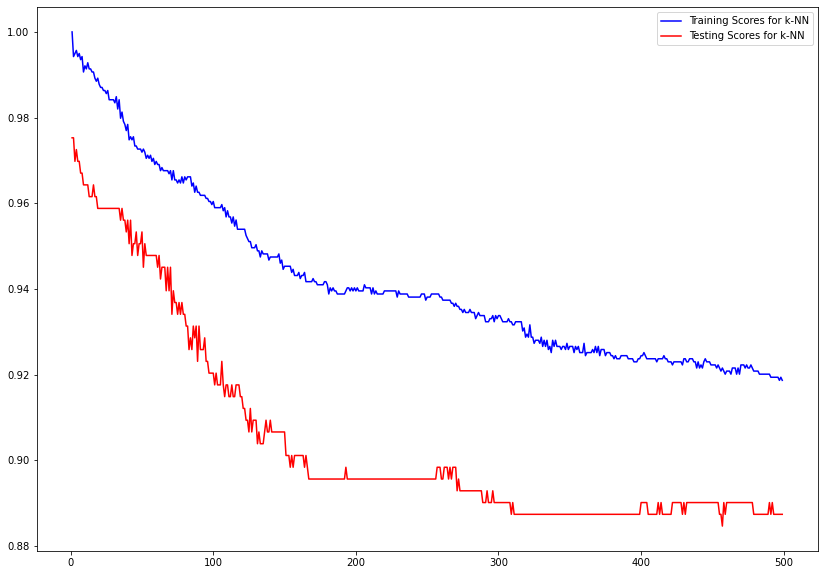

In [11]:
# loop for 1500 neighbors

neighbors = np.arange(1,500)
train_score = np.empty(len(neighbors))
test_score = np.empty(len(neighbors))

t = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(feature_train, label_train)
    train_score[t] = knn.score(feature_train, label_train)
    test_score[t] = knn.score(feature_test, label_test)
    t = t+1
    
# line graph

plt.rcParams["figure.figsize"] = (14,10)
plt.plot(neighbors, train_score, color = 'b', label = 'Training Scores for k-NN')
plt.plot(neighbors, test_score, color='r', label = 'Testing Scores for k-NN')
plt.legend()
plt.show()

### Builing the lienar regression model

The OLS algorithm is implemented in the `LinearRegression` class in the `linear_model` module of `scikit-learn`.

In [12]:
# implementation of OLS

from sklearn.linear_model import LinearRegression
ols = LinearRegression()

# fitting the model

ols.fit(feature_train, label_train)

# printing the scores for training and testing data

print("Training data score: {:.2f}".format(ols.score(feature_train, label_train)))
print("Testing data score: {:.2f}".format(ols.score(feature_test, label_test)))

Training data score: 0.90
Testing data score: 0.39


We can see that the OLS algorithm works not only far worse than that of *k*-NN, but it also is overfitting. That is, it works fine on the training data, but very bad on the testing dataset.

## Conclusion:

It is always a good idea to not use OLS for a classification problem.

**Final Note:** For more reading on *k*-Nearest Neighbors Algorithm and Linear Regression Algorithm, we recommend the beautiful book of A. C. Müller and S. Guido: [
Introduction to Machine Learning with Python: A Guide for Data](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/).

See you soon!